# Домашнее задание № 1

### Выполнил: Кузнецов С.И.

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

Загружаем датасет

In [2]:
FILE_PATH = 'housing.csv'
housing = pd.read_csv(FILE_PATH)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**Decsript:**

1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

**Масштабирование:**

а. Нормализовать признак - median_income

In [3]:
# Нормализуем переменную median_income
housing['median_income_normalize'] = preprocessing.normalize(X = [housing.median_income], norm = 'max')[0]

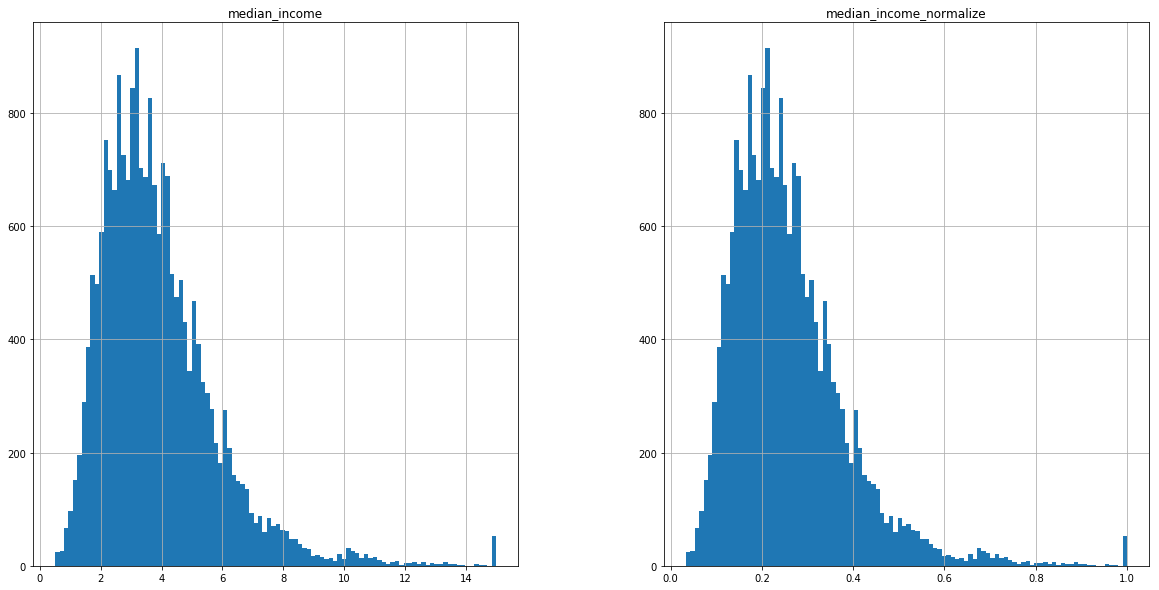

In [4]:
# Сравниваем распределения
_ = housing[['median_income', 'median_income_normalize']].hist(bins=100, figsize=(20, 10))

In [5]:
housing[['median_income', 'median_income_normalize']].describe()

,median_income,median_income_normalize
count,20640.000000,20640.000000
mean,3.870671,0.258043
std,1.899822,0.126654
min,0.499900,0.033326
25%,2.563400,0.170892
50%,3.534800,0.235652
75%,4.743250,0.316215
max,15.000100,1.000000


б. Привести признак - population к масштабу от 0 до 100

In [6]:
# Масштабируем переменную population
population_min, population_max = housing.population.min(), housing.population.max()
housing['population_scaled'] = (housing.population - population_min) / (population_max - population_min) * 100

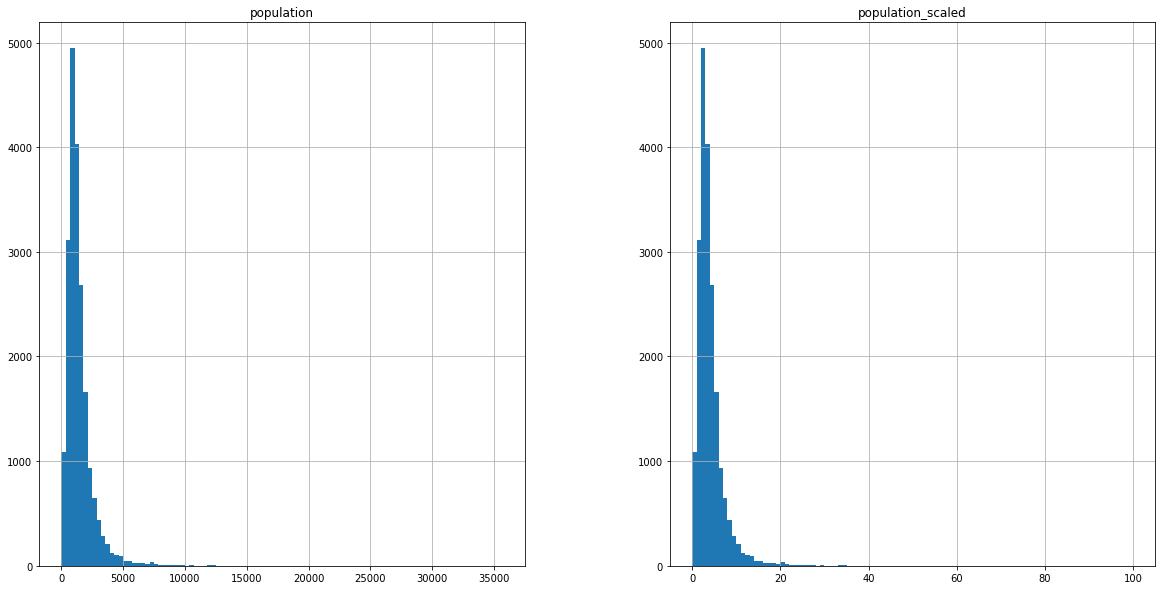

In [7]:
# Сравниваем распределения
_ = housing[['population', 'population_scaled']].hist(bins=100, figsize=(20, 10))

In [8]:
housing[['population', 'population_scaled']].describe()

,population,population_scaled
count,20640.000000,20640.000000
mean,1425.476744,3.986874
std,1132.462122,3.174030
min,3.000000,0.000000
25%,787.000000,2.197371
50%,1166.000000,3.259621
75%,1725.000000,4.826368
max,35682.000000,100.000000


**Заполнение пропусков:**

а. Заполнить пропуски в столбце total_bedrooms средними значениями по категориям столбца ocean_proximity.
Например, если пропущено значение в строке с категорией INLAND, нужно заполнить его средним значением по этой категории

In [9]:
# Вычисляем средние значения total_bedrooms в разрезе ocean_proximity_stat
ocean_proximity_stat = housing[['total_bedrooms', 'ocean_proximity']].groupby(['ocean_proximity']).mean()
ocean_proximity_stat

,total_bedrooms
ocean_proximity,
<1H OCEAN,546.539185
INLAND,533.881619
ISLAND,420.400000
NEAR BAY,514.182819
NEAR OCEAN,538.615677


In [10]:
def fill_na_by_stat(S, stat):
    '''Заменяет пропущенные значения total_bedrooms на серднестатистичекие'''
    if pd.isnull(S['total_bedrooms']):
        return(ocean_proximity_stat.total_bedrooms[S.ocean_proximity])
    else:
        return(S.total_bedrooms)

In [11]:
# Заменяем пропущенные значения
housing['total_bedrooms_m'] = housing.apply(fill_na_by_stat, axis = 1, stat = ocean_proximity_stat)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_normalize,population_scaled,total_bedrooms_m
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.555010,0.894083,129.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.553423,6.721040,1106.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.483823,1.381765,190.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.376204,1.555537,235.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.256412,1.575156,280.0


In [12]:
housing[pd.isnull(housing.total_bedrooms)].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_normalize,population_scaled,total_bedrooms_m
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY,0.291665,1.589170,514.182819
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY,0.107973,2.043219,514.182819
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY,0.171746,10.476751,514.182819
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY,0.329924,1.067855,514.182819
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY,0.260418,1.076263,514.182819


**Категорийные атрибуты:**

а. Посчитать среднее кол-во комнат в строке (total_rooms/households)

In [13]:
housing['avg_rooms'] = housing['total_rooms'] / housing['households']

In [14]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_normalize,population_scaled,total_bedrooms_m,avg_rooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.555010,0.894083,129.0,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.553423,6.721040,1106.0,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.483823,1.381765,190.0,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.376204,1.555537,235.0,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.256412,1.575156,280.0,6.281853


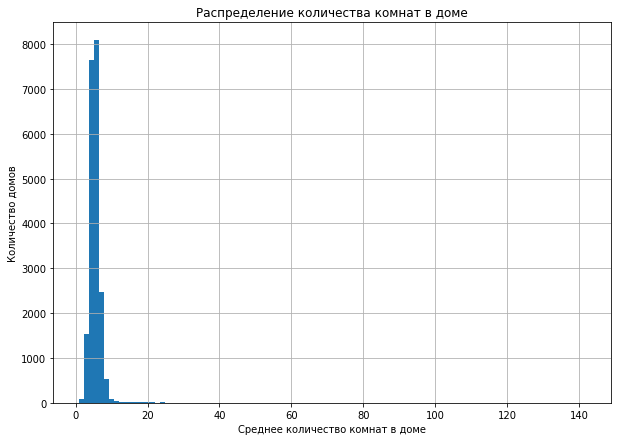

In [15]:
_ = housing.avg_rooms.hist(bins = 100, figsize = (10, 7))

plt.title('Распределение количества комнат в доме')
plt.xlabel('Среднее количество комнат в доме')
plt.ylabel('Количество домов')
plt.show()

б. Разбить полученный столбец на группы на ваше усмотрение (Например, 1 комната, 2 комнаты, 3 и более комнат)

Разобьем переменную на квантили

In [16]:
housing[['avg_rooms']].quantile([.1 * i for i in range(2, 10, 2)])

,avg_rooms
0.2,4.266667
0.4,4.934005
0.6,5.520848
0.8,6.268581


Интервалы разбиения: менее 4, 4, 5, 6 и более

In [17]:
def intervalization(x, points):
    
    '''
    Возвращает интервал между двумя соседними точками из списка points, в который попадает аргумент x.
    Список точек не обязательно должен быть упорядочен.
    
    Примеры:
    intervalization(1, [2, 3, 4, 5]) # -> 'less 2'
    intervalization(3, [2, 3, 4, 5]) # -> '[3; 4)'
    intervalization(5, [2, 3, 4, 5]) # -> 'more or equal 5'
    '''
    
    order_points = sorted(points)
    if x < order_points[0]:
        return('less {}'.format(order_points[0]))
    for i in range(len(order_points)):
        if x < order_points[i]:
            return('[{}; {})'.format(order_points[i - 1], order_points[i]))
    return('more or equal {}'.format(order_points[-1]))

In [18]:
housing['avg_rooms_group'] = housing.avg_rooms.apply(intervalization, points = [4, 5, 6])
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_normalize,population_scaled,total_bedrooms_m,avg_rooms,avg_rooms_group
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.555010,0.894083,129.0,6.984127,more or equal 6
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.553423,6.721040,1106.0,6.238137,more or equal 6
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.483823,1.381765,190.0,8.288136,more or equal 6
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.376204,1.555537,235.0,5.817352,[5; 6)
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.256412,1.575156,280.0,6.281853,more or equal 6


Построим диаграмму распределения переменной avg_rooms_group

In [19]:
pd.DataFrame(housing.avg_rooms_group.value_counts()).reset_index()

,index,avg_rooms_group
0,[5; 6),6510
1,[4; 5),5835
2,more or equal 6,5427
3,less 4,2868


No handles with labels found to put in legend.


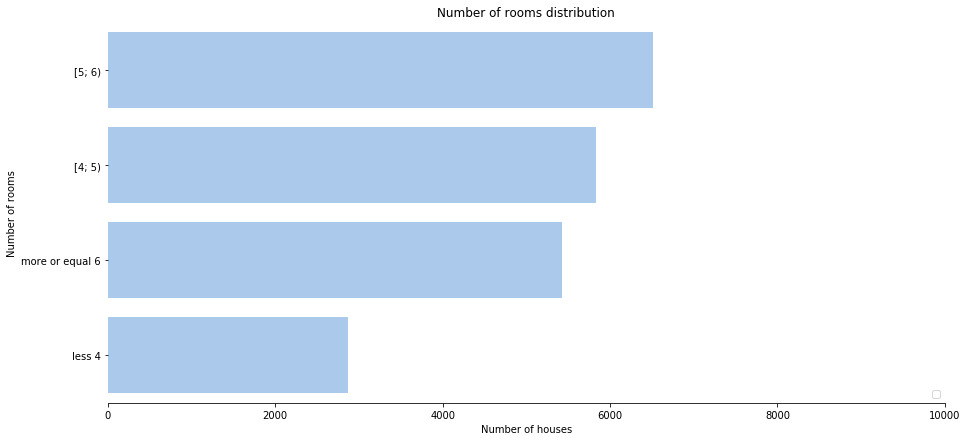

In [20]:
f, ax = plt.subplots(figsize=(15, 7))

sns.set_color_codes("pastel")
sns.barplot(x="avg_rooms_group",
            y="index", 
            data=pd.DataFrame(housing.avg_rooms_group.value_counts()).reset_index(), 
            color="b")

ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set(xlim=(0, 1e4), ylabel="Number of rooms",
       xlabel="Number of houses", title = "Number of rooms distribution")
sns.despine(left=True, bottom=False)